# 逻辑回归(LR)

逻辑回归虽然名字叫回归，但实质是个分类算法逻辑回归主要解决的二分类问题，如垃圾邮件的分类、肿瘤良性或者恶性的预测等。


首先我们要引出假设函数--Sigmod函数
$$g(z)=\frac{1}{1+e^{-z}},z=w^Tx+b$$

这个函数在$z<=0$时认为$g(z)=0$，$z>0$时$g(z)=1$，即$h(x)$

接下来引入损失函数
$$Cost(h(x),y) = \begin{cases}  
-\log (h(x)) & y = 1 \\
-\log (1-h(x)) & y=0
\end{cases}$$

我们把损失函数综合为一个式子
$$Cost(h(x),y)=-y\log (-h(x))-(1-y)\log (1-h(x))$$

最后，求损失函数的最小值，用梯度下降。

下面，我们先采用sklearn库中自带的logistic函数，鸢尾花数据分类

In [2]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split


# 导入鸢尾花数据
iris = datasets.load_iris()
X = iris.data[:, :3] # 取前3行
y = iris.target # 分类值

# 划分训练测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = linear_model.LogisticRegression(C=1e5)

lr.fit(x_train, y_train)

y_pre = lr.predict(x_test)

print(y_pre)

[1 2 1 0 2 1 0 2 2 0 2 2 1 1 0 0 2 1 1 1 2 2 2 2 2 1 2 2 1 1]


下面，我们用自定义函数来实现简单的逻辑回归：

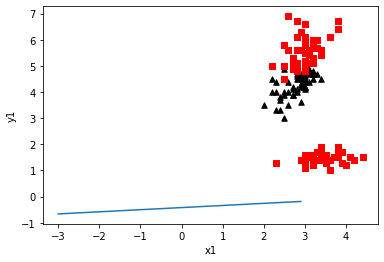

In [7]:


import numpy as np
from sklearn import linear_model, datasets



# ------使用 Logistic 回归在简单数据集上的分类-----------

def load_data_set():
    """
    加载数据集
    :return:返回两个数组，普通数组
        data_arr -- 原始数据的特征
        label_arr -- 原始数据的标签，也就是每条样本对应的类别
    """
    # 引入iris
    iris = datasets.load_iris()
    # 我们只采用样本数据的前两个feature
    X = iris.data
    Y = iris.target
    return X, Y


def sigmoid(x):
    # 这里其实非常有必要解释一下，会出现的错误 RuntimeWarning: overflow encountered in exp
    # 这个错误在学习阶段虽然可以忽略，但是我们至少应该知道为什么
    # 这里是因为我们输入的有的 x 实在是太小了，比如 -6000之类的，那么计算一个数字 np.exp(6000)这个结果太大了，没法表示，所以就溢出了
    # 如果是计算 np.exp（-6000），这样虽然也会溢出，但是这是下溢，就是表示成零
    # 去网上搜了很多方法，比如 使用bigfloat这个库（我竟然没有安装成功，就不尝试了，反正应该是有用的
    return 1.0 / (1 + np.exp(-x))


def grad_ascent(data_arr, class_labels):
    """
    梯度上升法，其实就是因为使用了极大似然估计，这个大家有必要去看推导，只看代码感觉不太够
    :param data_arr: 传入的就是一个普通的数组，当然你传入一个二维的ndarray也行
    :param class_labels: class_labels 是类别标签，它是一个 1*100 的行向量。
                    为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给label_mat
    :return: 
    """
    # 注意一下，我把原来 data_mat_in 改成data_arr,因为传进来的是一个数组，用这个比较不容易搞混
    # turn the data_arr to numpy matrix
    data_mat = np.mat(data_arr)
    # 变成矩阵之后进行转置
    label_mat = np.mat(class_labels).transpose()
    # m->数据量，样本数 n->特征数
    m, n = np.shape(data_mat)
    # 学习率，learning rate
    alpha = 0.001
    # 最大迭代次数，假装迭代这么多次就能收敛2333
    max_cycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = np.ones((n, 1))
    for k in range(max_cycles):
        # 这里是点乘  m x 3 dot 3 x 1
        h = sigmoid(data_mat * weights)
        error = label_mat - h
        # 这里比较建议看一下推导，为什么这么做可以，这里已经是求导之后的
        weights = weights + alpha * data_mat.transpose() * error
    return weights


def plot_best_fit(weights):
    """
    可视化
    :param weights: 
    :return: 
    """
    import matplotlib.pyplot as plt
    data_mat, label_mat = load_data_set()
    data_arr = np.array(data_mat)
    n = np.shape(data_mat)[0]
    x_cord1 = []
    y_cord1 = []
    x_cord2 = []
    y_cord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            x_cord1.append(data_arr[i, 1])
            y_cord1.append(data_arr[i, 2])
        else:
            x_cord2.append(data_arr[i, 1])
            y_cord2.append(data_arr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1, y_cord1, s=30, color='k', marker='^')
    ax.scatter(x_cord2, y_cord2, s=30, color='red', marker='s')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以:  w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.show()


def stoc_grad_ascent0(data_mat, class_labels):
    """
    随机梯度上升，只使用一个样本点来更新回归系数
    :param data_mat: 输入数据的数据特征（除去最后一列）,ndarray
    :param class_labels: 输入数据的类别标签（最后一列数据）
    :return: 得到的最佳回归系数
    """
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        # sum(data_mat[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,
        # 此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(data_mat[i] * weights))
        error = class_labels[i] - h
        # 还是和上面一样，这个先去看推导，再写程序
        weights = weights + alpha * error * data_mat[i]
    return weights


def stoc_grad_ascent1(data_mat, class_labels, num_iter=150):
    """
    改进版的随机梯度上升，使用随机的一个样本来更新回归系数
    :param data_mat: 输入数据的数据特征（除去最后一列）,ndarray
    :param class_labels: 输入数据的类别标签（最后一列数据
    :param num_iter: 迭代次数
    :return: 得到的最佳回归系数
    """
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        # 这里必须要用list，不然后面的del没法使用
        data_index = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4 / (1.0 + j + i) + 0.01
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[data_index[rand_index]] * weights))
            error = class_labels[data_index[rand_index]] - h
            weights = weights + alpha * error * data_mat[data_index[rand_index]]
            del(data_index[rand_index])
    return weights


def test():
    """
    这个函数只要就是对上面的几个算法的测试，这样就不用每次都在power shell 里面操作，不然麻烦死了
    :return: 
    """
    data_arr, class_labels = load_data_set()
    # 注意，这里的grad_ascent返回的是一个 matrix, 所以要使用getA方法变成ndarray类型
    # weights = grad_ascent(data_arr, class_labels).getA()
    # weights = stoc_grad_ascent0(np.array(data_arr), class_labels)
    weights = stoc_grad_ascent1(np.array(data_arr), class_labels)
    plot_best_fit(weights)


# -------从疝气病症预测病马的死亡率------


def classify_vector(in_x, weights):
    """
    最终的分类函数，根据回归系数和特征向量来计算 Sigmoid 的值，大于0.5函数返回1，否则返回0
    :param in_x: 特征向量，features
    :param weights: 根据梯度下降/随机梯度下降 计算得到的回归系数
    :return: 
    """
    # print(np.sum(in_x * weights))
    prob = sigmoid(np.sum(in_x * weights))
    if prob > 0.5:
        return 1.0
    return 0.0





if __name__ == '__main__':
    
    test()
    



# GBDT

GBDT(Gradient Boosting Decision Tree) 叫梯度提升决策树。是通过采用加法模型（即基函数的线性组合），以及不断减小训练过程产生的残差来达到将数据分类或者回归的算法。

GBDT是通过多次迭代，每次迭代产生一个弱分类器，每个分类器在上一轮分类器的梯度上继续训练。一般损失函数定为平方损失函数，因为这样梯度就是残差。

一般弱分类器会选择CART TREE(回归树)不是分类树，因为GBDT每次迭代要拟合的是梯度值，是连续值所以要用回归树。


模型一般可以描述为：
$$F_m(x)=\sum_{m=1}^MT(x;\theta_m)$$

 模型一共训练M轮，每轮产生一个弱分类器 $T(x;\theta_m)$。弱分类器的损失函数为:
 $$\hat{\theta}_m=argmin\sum_{i=1}^NL(y_i,F_{m-1}(x_i)+T(x_i;\theta_m))$$

在sklearn库中，GBDT的分类函数为GradientBoostingClassifier， 而GBDT的回归函数为GradientBoostingRegressor，我们以回归来做sklearn中的波士顿房价：

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# 导入波士顿房价数据
boston = datasets.load_boston()
X = boston.data # 取X
y = boston.target # 房价值

# 划分训练测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 定义GBDT回归树
gbdt = GradientBoostingRegressor(loss='ls',
                                learning_rate=0.1,
                                n_estimators=100,
                                 subsample=1,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_depth=3,
                                 init=None,
                                 random_state=None,
                                 max_features=None,
                                 alpha=0.9,
                                 verbose=0,
                                 max_leaf_nodes=None,
                                 warm_start=False
                                )
gbdt.fit(x_train,y_train)
y_pred = gbdt.predict(x_test)
print(y_test)
print(y_pred)

[12.1 35.1 20.7 30.1 13.8 27.1 13.3 24.4 44.8 17.4  6.3 23.1 21.7 21.2
 19.  24.8 19.5 18.9 22.9 20.  24.4  7.2 16.7 24.7 22.2 50.  24.3 14.5
 20.6 22.8 22.8 18.4 23.2 33.3 17.8 50.  24.6 19.6 20.4 22.  24.8 25.
 50.  11.9 20.6 17.9 10.5 11.7 12.7 11.7 12.3 21.7 22.6 46.7 23.4 15.2
 20.3 27.5 25.2 18.7 27.5  8.8 23.9 20.  37.6 43.1 14.9 18.5 13.9 23.6
 28.4 23.  50.  29.  19.4 10.2 15.2 10.4 17.8 32.  21.2 14.  26.6 19.7
 15.6 25.   8.4 29.  17.1 21.5  7.  37.2 15.2 24.3 14.1 18.2 19.8 17.1
  7.4 34.9 24.  10.4]
[11.12157447 34.27498744 22.85922363 32.15938756 16.47036907 17.46985267
 12.90106373 23.4128656  44.63890678 19.31136967 11.11002626 21.68919103
 21.55252641 20.91816651 20.19652772 23.92606937 17.22455402 17.27248798
 23.52743937 20.937784   23.54238275  7.68376356 15.75476958 22.34323274
 20.53413779 48.29323059 25.01573702 16.38953173 15.62958591 23.41022633
 28.99238144 15.8988962  19.57402721 37.13359116 13.4485709  43.18331774
 23.5973199  19.67522774 19.28747838 22.3279

# CF(基于内存的协同过滤)

CF主要分为1.基于用户的CF(User CF)和2.基于物品的CF(Item CF)。

### 1.基于用户的CF(User CF)

简单来说就是，基于用户对于物品的偏好找到相邻的用户，然后把邻居喜欢的物品推荐给当前用户。

1.找到和目标用户相似的用户集合

2.找到集合中用户喜欢的，且目标用户没有用过的物品

### 2.基于物品的CF(Item CF)

计算邻居时以物品为对象，找到物品的相似集合，在集合中推荐给用户

### 3.相似度

可以用皮尔逊相关系数、欧氏距离、马氏距离、余弦相似度表示

### 4.聚类

可用系统聚类、K-means聚类、KNN聚类等，把相似的用户或人作为一个集合。

### 5.User CF和Item CF比较

1. User适用于用户较少的情况，Item实用与物品数小于用户数的情况。

2. User适用物品增长很快，实时性较高的情况，如新闻推荐；Item适用于淘宝某商铺、电影等。

# FM(因子分解机)

FM主要是为了解决数据稀疏矩阵的情况，特征该如何组合

以二阶为例，FM为


\begin{aligned}
y&=w_0+\sum_{i=1}^nw_ix_i+\sum_{i=1}^n\sum_{j=i+1}^nw_{ij}x_iy_i \\
&= w_0+\sum_{i=1}^nw_ix_i+\sum_{i=1}^n\sum_{j=i+1}^n(V_i^TV_j)x_iy_i \\
\end{aligned}

\begin{aligned}
\sum_{i=1}^n\sum_{j=i+1}^n(V_i^TV_j)x_iy_i&= \frac{1}{2}(\sum_{i=1}^n\sum_{j=1}^n(V_i^TV_j)x_ix_j-\sum_{i=1}^n(V_i^TV_i)x_ix_i)\\
&= \frac{1}{2}(\sum_{i=1}^n\sum_{j=1}^n\sum_l^k(v_{i,l}v_{j,l})x_ix_j-\sum_{i}^n\sum_l^kv_{i,l}^2x_i^2)\\
&= \frac{1}{2}\sum_l^k(\sum_i^nv_{i,l}x_i\sum_{j=1}^n(v_{j,l}x_j)-\sum_i^nv_{i,l}^2x_i^2)\\
&= \frac{1}{2}\sum_{l=1}^k((\sum_{i=1}^n(v_{i,l}x_i))^2-\sum_i^nv_{i,l}^2x_i^2)
\end{aligned}


如果是回归问题，损失函数可以用MSE
$$loss=\frac{1}{2}\sum_{i=1}^m(\hat{y}-y)^2$$

如果是二分类问题，损失函数可用上述loglist loss。

参数问题可用SGD、ALS等，ALS为交替最小二乘法，相当于User CF和Item CF综合交替求解。

# Wide&Deep

wide是线性模型，难以泛化；而deep是深度模型，又容易过拟合。所以提出W&D模型，平衡Wide模型和Deep模型的记忆能力和泛化能力。

### wide

wide部分就是线性模型，为$y=wx+b$，$x$包含基础特征和交叉特征，交叉特征为
$$\phi_k(x)=\prod_{i=1}^dx_i^{c_{ki}} \ \ \ c_{ki}\in \{1,0\}$$

### deep

deep是前馈神经网络模型，特征先转换成低维的稠密向量，向量随机初始化，经过最小化随时函数训练模型，激活函数用Relu，前馈部分为：
$$a^{(l+1)}=f(W^{(l)}a^{(l)}+b{(l)})$$

### W&D

在Wide&Deep中，把Wide和Deep的输出通过加权方式合并到一起，并通过logistic的损失函数输出。$$P(Y=1|x)=\sigma (w_{wide}[x,\phi(x)]+w_{deep}a^{(l_f)}+b)$$

# DIN(Deep Interest Network )

DIN是阿里团队发明的，常见的算法比如Wide&Deep，DeepFM等。这些方法一般的思路是：通过Embedding层，将高维离散特征转换为固定长度的连续特征，然后通过多个全联接层，最后通过一个sigmoid函数转化为0-1值，代表点击的概率。即Sparse Features -> Embedding Vector -> MLPs -> Sigmoid -> Output.

但是实际情况下，用户行为数据中有两个很重要的特性：

Diversity：用户在浏览电商网站的过程中显示出的兴趣是十分多样性的。

Local activation: 由于用户兴趣的多样性，只有部分历史数据会影响到当次推荐的物品是否被点击，而不是所有的历史记录。


整个流程可以描述为：

1.检查用户历史行为数据

2.使用matching module产生候选ads。

3.通过ranking module做point-wise的排序，即得到每个候选ads的点击概率，并根据概率排序得到推荐列表。

4.记录下用户在当前展示广告下的反应(点击与否)，作为label。


Deep Interest Network 的模型结构：
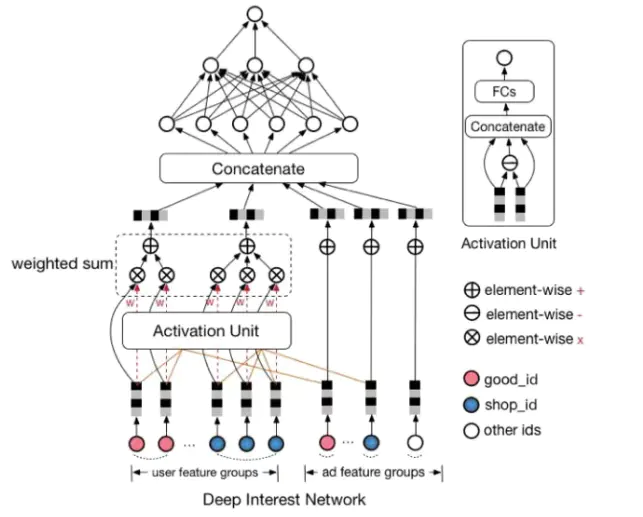

主要是引入了Attention机制进行加权，也是上图中Activation Unit要学习的，在加入Activation Unit之后，用户的兴趣表示计算如下：
$$V_u=f(V_a)=\sum_{i=1}^Nw_i*V_i=\sum_{i=1}^Ng(V_i,V_a)*V_i$$

其中，$V_i$表示behaviorI_id i的嵌入向量，比如good_id,shop_id等。$V_u$是所有behavior_ids的加权和，表示的是用户兴趣；$V_a$是候选广告的嵌入向量；$w_i$是候选广告影响着每个behavior_id的权重，也就是Local Activation。$w_i$通过Activation Unit计算得出，这一块用函数去拟合，表示为$g(V_i,V_a)$。



### Dice激活函数

Dice函数由PRelu激活函数改编而来：
$$y_i=a_i(1-p_i)y_i+p_iy_i=a_i(1-p_i)y_i+y_i\frac{1}{1+e^{-\frac{y_i-E[y_i]}{\sqrt{var[y_i]}+e}}}$$

其中：E[y]和Var[y]是每个小批量输入数据的均值和方差，e是一个常数

 # ARIMA(自回归差分移动平均模型)

是个比较常见的时间序列模型，主要是通过差分，使得数据趋于平稳。主要步骤如下：

1.对于数据先进行d阶差分运算，化为平稳时间序列

2.获得平稳序列后，分别求得其自相关系数ACF 和偏自相关系数PACF ，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q

3.通过上述的d、q、p得到最终模型，并对模型进行检验。

接下来，我们来用python做个ARIMA的小案例：

In [61]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

<AxesSubplot:>

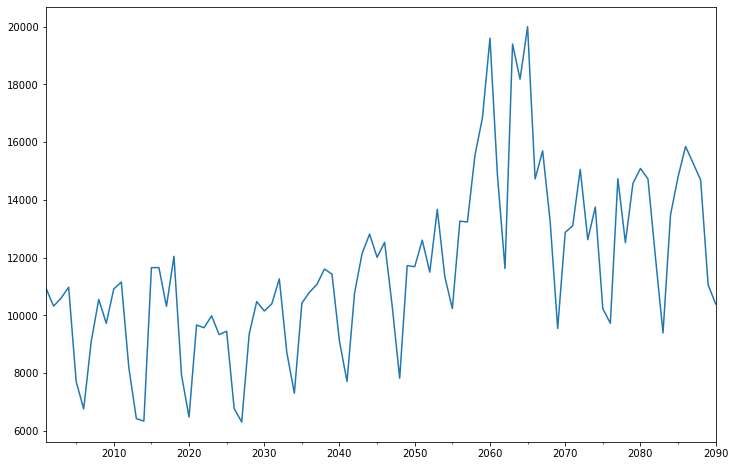

In [62]:
data=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]
data=pd.Series(data)
# print(len(data))
data.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
data.plot(figsize=(12,8))

我们尝试下一阶差分

<AxesSubplot:>

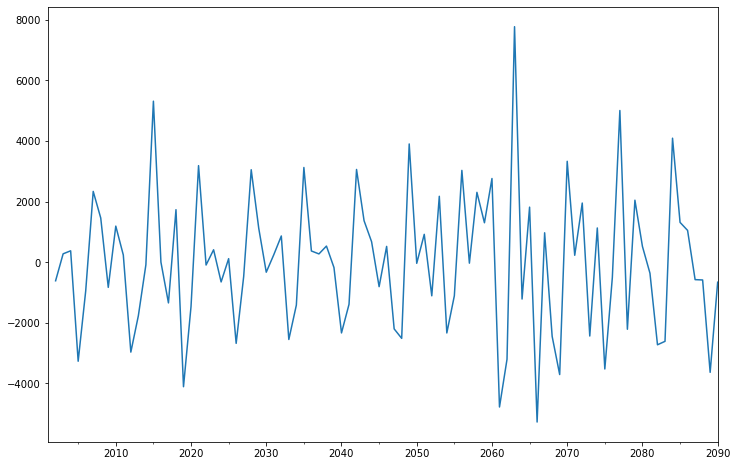

In [63]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = data.diff(1)
diff1.plot(ax=ax1)

我们看出一阶差分基本已经平稳，再尝试二阶差分

<AxesSubplot:>

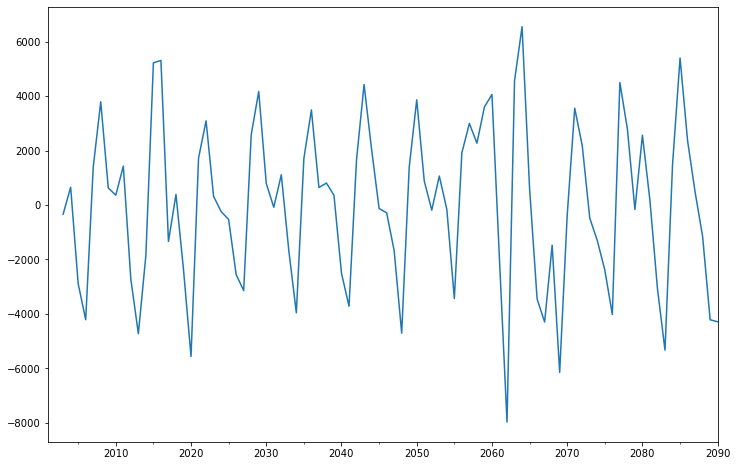

In [64]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = data.diff(2)
diff2.plot(ax=ax2)

发现二阶差分后的时间序列与一阶差分相差不大，故差分阶数设为1

接下来，我们画出这个序列的自相关图和偏相关系数：

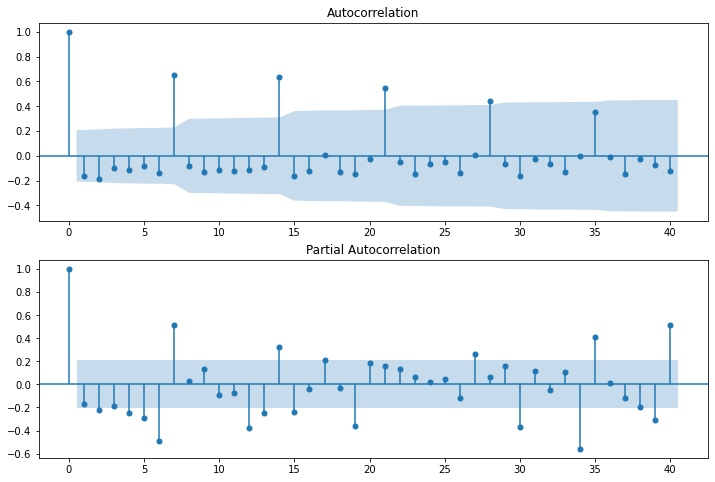

In [65]:
data_diff = data.diff(1)
data_diff = data_diff[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff,lags=40,ax=ax2)

In [41]:
for i in range(8):
    for j in range(8):
        
        try:
            model = sm.tsa.ARMA(data_diff,(i,j)).fit()
            print(model.aic,model.bic,model.hqic,i,j)
        except:
            pass

1636.4780459718424 1641.4553187113067 1638.4842417789664 0 0
1632.3203731478084 1639.7862822570048 1635.3296668584942 0 1
1620.80866417395 1630.7632096528787 1624.8210557881978 0 2
1622.064005541351 1634.5071873900117 1627.0794950591605 0 3
1620.5600632378098 1635.4918814562027 1626.5786506591814 0 4
1622.3287583635258 1639.7492129516509 1629.3504436884593 0 5
1617.4349402783453 1637.3440312362025 1625.4597235068406 0 6
1611.428483851324 1633.8262111789134 1620.4563649833813 0 7
1636.0512306481896 1643.517139757386 1639.0605243588755 1 0
1620.8174024176994 1630.771947896628 1624.8297940319471 1 1
1622.021954749944 1634.4651365986047 1627.0374442677535 1 2
1623.291549764093 1638.2233679824858 1629.3101371854646 1 3
1621.1165492444914 1638.5370038326164 1628.1382345694249 1 4
1619.0946975502027 1639.0037885080599 1627.119480778698 1 5
1613.3583625983547 1638.2447262956762 1623.389341633974 1 7
1633.6495233124565 1643.604068791385 1637.6619149267042 2 0
1621.6838590252748 1634.12704087393

我们发现，当p=7,q=0时，aic，bic，hqic最小

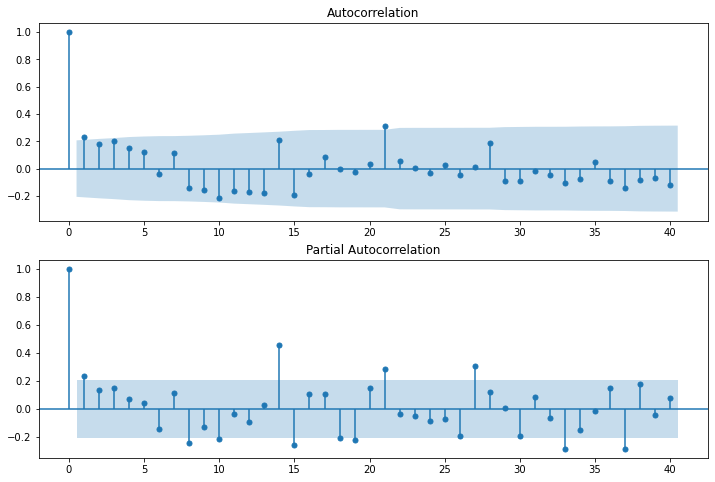

In [69]:
model = sm.tsa.ARMA(data,order=(7,0,7)).fit()
resid = model.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

再用D-W检验自相关性：发现为1.5<4，所以不存在自相关性

In [70]:
print(sm.stats.durbin_watson(model.resid.values))

1.531726140846895


用QQ图检验是否符合正态分布：

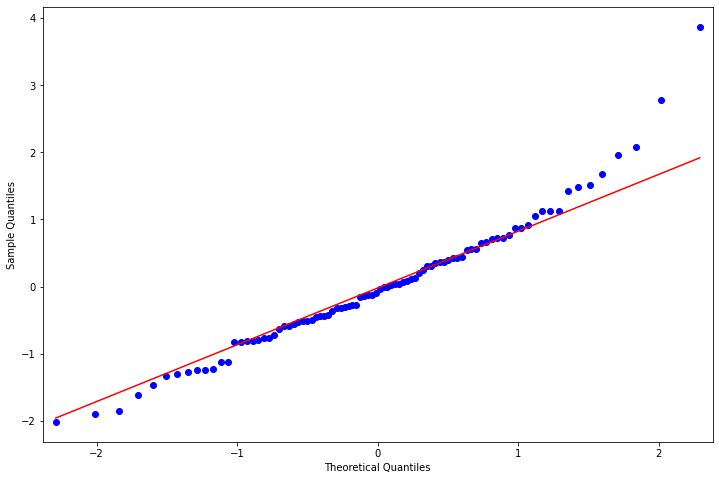

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

大致符合正态分布

最后，我们预测2090到2100年的：

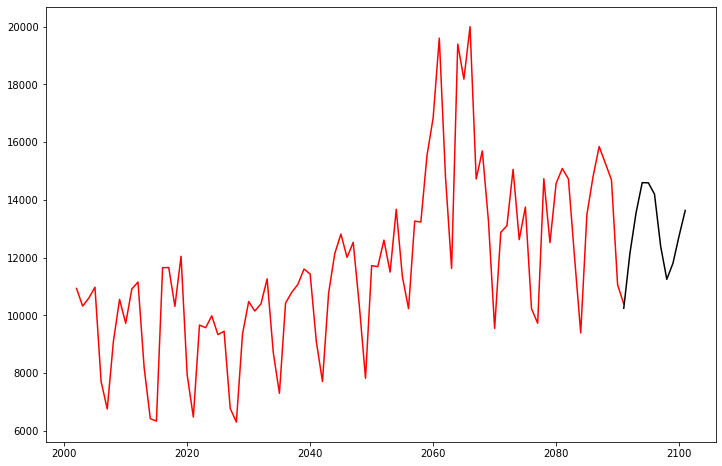

In [79]:
predict_data = model.predict('2090', '2100', dynamic=True)

fig = plt.subplots(figsize=(12, 8))
plt.plot(data,c='r')
plt.plot(predict_data,c='k')
# print(data)
# ax = data.ix['2002':].plot(ax=ax)
# fig = model.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
# plt.show()

# Prophet: 时间序列预测库

prophet是facebook的开源库，输入数据分为两个，x和y

1.x是pandas的日期格式，样式类似与 YYYY-MM-DDfora dateorYYYY-MM-DD HH:MM:SS

2.y是数值型

In [1]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


<AxesSubplot:xlabel='ds'>

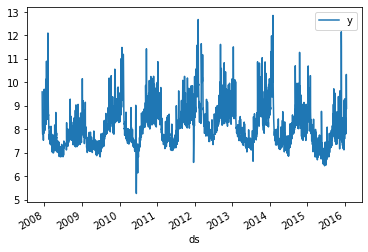

In [2]:
df['ds'] = df['ds'].apply(pd.to_datetime)
df.set_index('ds').plot() 

In [ ]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
fig1 = prophet.plot(forecast)
print(fig1)

# LSTM 长短时间记忆网络

LSTM的特点就是在RNN结构以外添加了各层的阀门节点。阀门有3类：遗忘阀门（forget gate），输入阀门（input gate）和输出阀门（output gate）。这些阀门可以打开或关闭，用于将判断模型网络的记忆态（之前网络的状态）在该层输出的结果是否达到阈值从而加入到当前该层的计算中。如图中所示，阀门节点利用sigmoid函数将网络的记忆态作为输入计算；如果输出结果达到阈值则将该阀门输出与当前层的的计算结果相乘作为下一层的输入（PS：这里的相乘是在指矩阵中的逐元素相乘）；如果没有达到阈值则将该输出结果遗忘掉。每一层包括阀门节点的权重都会在每一次模型反向传播训练过程中更新。

LSTM model: LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)
model.parameters: <bound method Module.parameters of LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)>
Epoch: [100/10000], Loss:0.00243
Epoch: [200/10000], Loss:0.00145
Epoch: [300/10000], Loss:0.00018
Epoch: [400/10000], Loss:0.00013
Epoch: [500/10000], Loss:0.00011
Epoch: [600/10000], Loss:0.00014
Epoch [670/10000], Loss: 0.00010
The loss value is reached


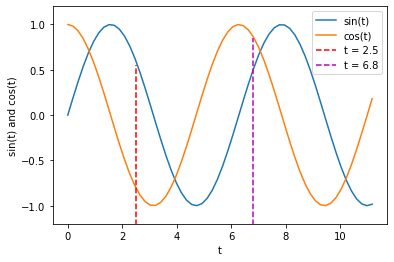

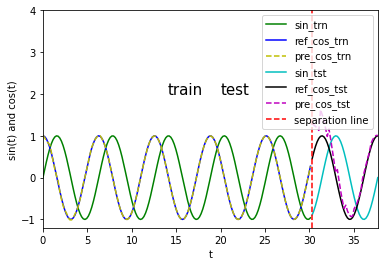

In [5]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Define LSTM Neural Networks
class LstmRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
    def __init__(self, input_size, hidden_size=1, output_size=1, num_layers=1):
        super().__init__()
 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers) # utilize the LSTM model in torch.nn 
        self.forwardCalculation = nn.Linear(hidden_size, output_size)
 
    def forward(self, _x):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = x.view(s*b, h)
        x = self.forwardCalculation(x)
        x = x.view(s, b, -1)
        return x
    
if __name__ == '__main__':
    # 创建数据，以y=sin(x)和y=cos(x)为例
    data_len = 200
    t = np.linspace(0, 12*np.pi, data_len)
    sin_t = np.sin(t)
    cos_t = np.cos(t)

    dataset = np.zeros((data_len, 2))
    dataset[:,0] = sin_t
    dataset[:,1] = cos_t
    dataset = dataset.astype('float32')

    # 画图
    plt.figure()
    plt.plot(t[0:60], dataset[0:60,0], label='sin(t)')
    plt.plot(t[0:60], dataset[0:60,1], label = 'cos(t)')
    plt.plot([2.5, 2.5], [-1.3, 0.55], 'r--', label='t = 2.5') # t = 2.5
    plt.plot([6.8, 6.8], [-1.3, 0.85], 'm--', label='t = 6.8') # t = 6.8
    plt.xlabel('t')
    plt.ylim(-1.2, 1.2)
    plt.ylabel('sin(t) and cos(t)')
    plt.legend(loc='upper right')

    # 拆分训练集和测试集
    train_data_ratio = 0.8 
    train_data_len = int(data_len*train_data_ratio)
    train_x = dataset[:train_data_len, 0]
    train_y = dataset[:train_data_len, 1]
    INPUT_FEATURES_NUM = 1
    OUTPUT_FEATURES_NUM = 1
    t_for_training = t[:train_data_len]

    # test_x = train_x
    # test_y = train_y
    test_x = dataset[train_data_len:, 0]
    test_y = dataset[train_data_len:, 1]
    t_for_testing = t[train_data_len:]

    # ----------------- train -------------------
    train_x_tensor = train_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5
    train_y_tensor = train_y.reshape(-1, 5, OUTPUT_FEATURES_NUM) # set batch size to 5
 
    # 转成tensor格式
    train_x_tensor = torch.from_numpy(train_x_tensor)
    train_y_tensor = torch.from_numpy(train_y_tensor)
    # test_x_tensor = torch.from_numpy(test_x)
 
    lstm_model = LstmRNN(INPUT_FEATURES_NUM, 16, output_size=OUTPUT_FEATURES_NUM, num_layers=1) # 16 hidden units
    print('LSTM model:', lstm_model)
    print('model.parameters:', lstm_model.parameters)
 
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-2)
 
    max_epochs = 10000
    for epoch in range(max_epochs):
        output = lstm_model(train_x_tensor)
        loss = loss_function(output, train_y_tensor)
 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
 
        if loss.item() < 1e-4:
            print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch+1, max_epochs, loss.item()))
            print("The loss value is reached")
            break
        elif (epoch+1) % 100 == 0:
            print('Epoch: [{}/{}], Loss:{:.5f}'.format(epoch+1, max_epochs, loss.item()))
 
    # 训练集的预测
    predictive_y_for_training = lstm_model(train_x_tensor)
    predictive_y_for_training = predictive_y_for_training.view(-1, OUTPUT_FEATURES_NUM).data.numpy()

    # torch.save(lstm_model.state_dict(), 'model_params.pkl') # save model parameters to files
 
    # ----------------- test -------------------
    # lstm_model.load_state_dict(torch.load('model_params.pkl'))  # load model parameters from files
    lstm_model = lstm_model.eval() # switch to testing model

    # 测试集的预测
    test_x_tensor = test_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5, the same value with the training set
    test_x_tensor = torch.from_numpy(test_x_tensor)
 
    predictive_y_for_testing = lstm_model(test_x_tensor)
    predictive_y_for_testing = predictive_y_for_testing.view(-1, OUTPUT_FEATURES_NUM).data.numpy()
 
    # ----------------- plot -------------------
    plt.figure()
    plt.plot(t_for_training, train_x, 'g', label='sin_trn')
    plt.plot(t_for_training, train_y, 'b', label='ref_cos_trn')
    plt.plot(t_for_training, predictive_y_for_training, 'y--', label='pre_cos_trn')

    plt.plot(t_for_testing, test_x, 'c', label='sin_tst')
    plt.plot(t_for_testing, test_y, 'k', label='ref_cos_tst')
    plt.plot(t_for_testing, predictive_y_for_testing, 'm--', label='pre_cos_tst')

    plt.plot([t[train_data_len], t[train_data_len]], [-1.2, 4.0], 'r--', label='separation line') # separation line

    plt.xlabel('t')
    plt.ylabel('sin(t) and cos(t)')
    plt.xlim(t[0], t[-1])
    plt.ylim(-1.2, 4)
    plt.legend(loc='upper right')
    plt.text(14, 2, "train", size = 15, alpha = 1.0)
    plt.text(20, 2, "test", size = 15, alpha = 1.0)

    plt.show()

# n-beats 神经网络底层扩展分析

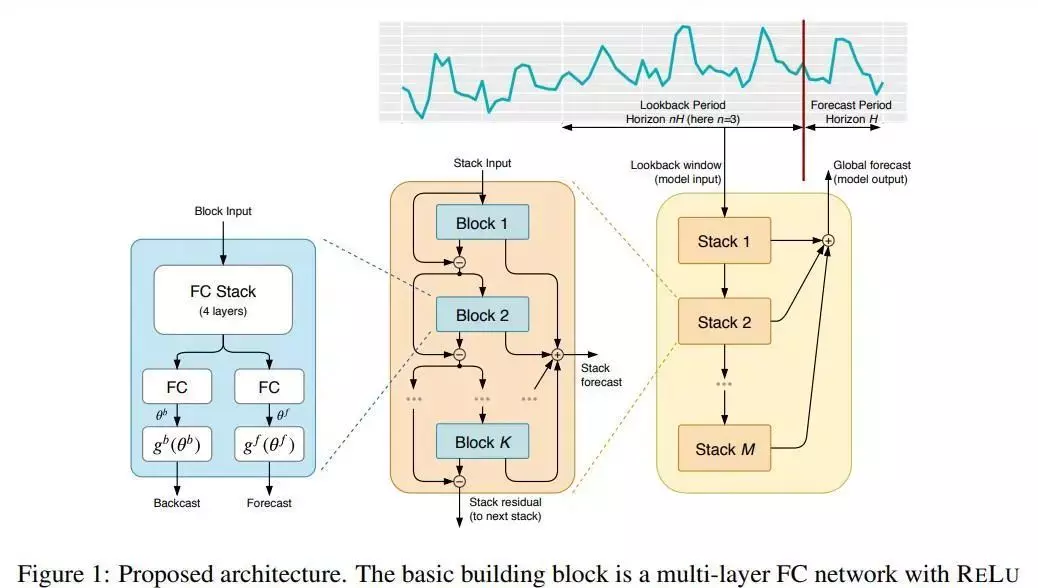